## Интеллектуальный анализ данных – весна 2024
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [3]:
missing_values = X.isnull().sum().sum()
print("Количество пропущенных значений в наборе данных:", missing_values)

Количество пропущенных значений в наборе данных: 0


**Значит пропусков нет**

In [4]:
X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

**В этом наборе данных все признаки являются числовыми, что указывает на отсутствие категориальных признаков**

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [25]:
from sklearn.model_selection import train_test_split

np.random.seed(50)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Проверка доли классов
print("Пропорции классов в исходной выборке:")
print(pd.Series(y).value_counts(normalize=True))

print("\nПропорции классов в тренировочной выборке:")
print(pd.Series(y_train).value_counts(normalize=True))

print("\nПропорции классов в тестовой выборке:")
print(pd.Series(y_test).value_counts(normalize=True))

Пропорции классов в исходной выборке:
1    0.398876
0    0.331461
2    0.269663
dtype: float64

Пропорции классов в тренировочной выборке:
1    0.403226
0    0.330645
2    0.266129
dtype: float64

Пропорции классов в тестовой выборке:
1    0.388889
0    0.333333
2    0.277778
dtype: float64


**Использование аргумента stratify при разделении выборки на тренировочную и тестовую чрезвычайно важно, особенно в случае несбалансированных классов. Когда классы в целевой переменной имеют разные пропорции в общей выборке, стратифицированное разбиение гарантирует, что эти пропорции будут сохранены как в тренировочном, так и в тестовом наборах данных**

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Выбор только двух признаков: alcohol и magnesium
X_train_subset = X_train[['alcohol', 'magnesium']]
X_test_subset = X_test[['alcohol', 'magnesium']]

# Создание списка с числом соседей для классификаторов kNN
n_neighbors_list = [1, 3, 5, 10, 15, 25]

# Создание пайплайна для стандартизации признаков и обучения классификатора
pipe = Pipeline([
    ('scaler', StandardScaler()),  # стандартизация признаков
    ('knn', KNeighborsClassifier())  # классификатор kNN
])

# Функция для обучения классификатора с заданным числом соседей и вычисления точности
def train_and_evaluate(n_neighbors):
    pipe.set_params(knn__n_neighbors=n_neighbors)
    pipe.fit(X_train_subset, y_train)
    train_preds = pipe.predict(X_train_subset)
    test_preds = pipe.predict(X_test_subset)
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    return train_accuracy, test_accuracy

# Применение функции к списку чисел соседей
results = map(train_and_evaluate, n_neighbors_list)

results_df = pd.DataFrame(results, index=[1, 3, 5, 10, 15, 25], columns=['Train', 'Test'])
results_df

,Train,Test
1,1.000000,0.611111
3,0.814516,0.666667
5,0.806452,0.648148
10,0.733871,0.777778
15,0.733871,0.777778
25,0.693548,0.703704


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [10]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [11]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

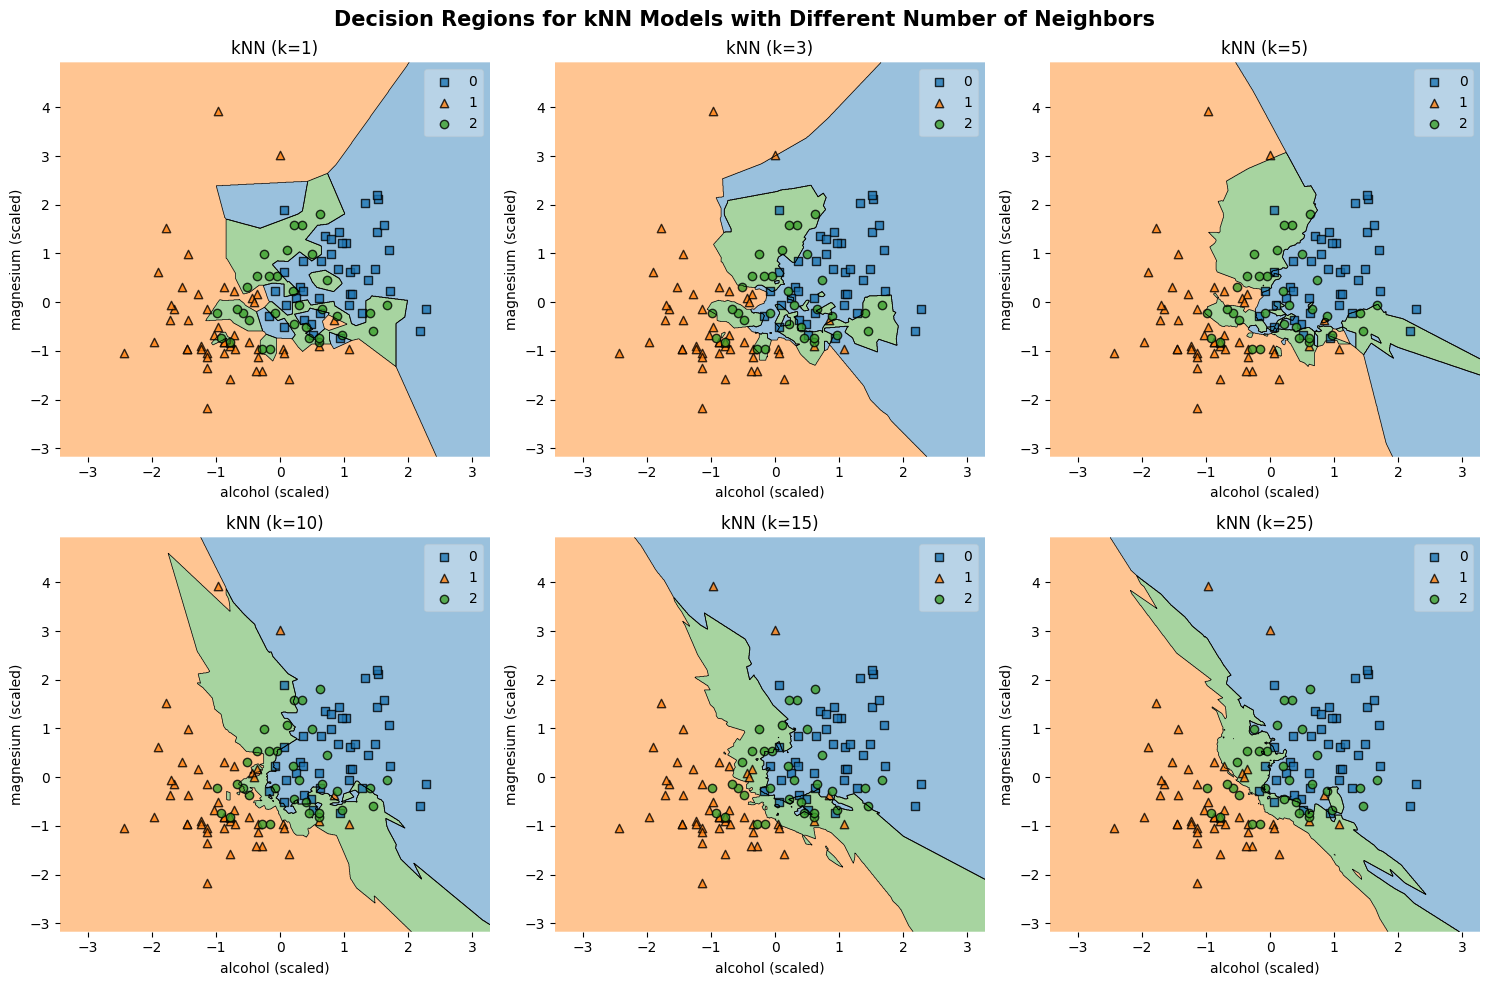

In [31]:
from mlxtend.plotting import plot_decision_regions

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['alcohol', 'magnesium']])
X_test_scaled = scaler.transform(X_test[['alcohol', 'magnesium']])
# Создание моделей kNN с различным числом соседей
models = {}
for n_neighbors in [1, 3, 5, 10, 15, 25]:
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train_scaled, y_train)
    models[n_neighbors] = model

# Построение графиков решающих поверхностей
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
plt.suptitle("Decision Regions for kNN Models with Different Number of Neighbors", fontsize=15, weight="bold")

for ax, (n_neighbors, model) in zip(axes.flatten(), models.items()):
    plot_decision_regions(X_train_scaled, y_train, clf=model, ax=ax)
    ax.set_title(f"kNN (k={n_neighbors})")
    ax.set_xlabel('alcohol (scaled)')
    ax.set_ylabel('magnesium (scaled)')

plt.tight_layout()
plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

**Из результатов видно, что модель с 5 соседями демонстрирует лучшую обобщающую способность на тестовой выборке по сравнению с моделями, использующими 1, 3, 10, 15 или 25 соседей. Модели с меньшим числом соседей (1, 3) имеют более сложные решающие границы, что может привести к переобучению, в то время как модели с более высоким числом соседей (10, 15, 25) могут недообучаться из-за слишком грубых решающих границ. Модель с 5 соседями находится посередине, обеспечивая достаточно гладкую решающую границу для учета деталей данных, и в то же время избегая излишнего подгонки под обучающие данные**

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

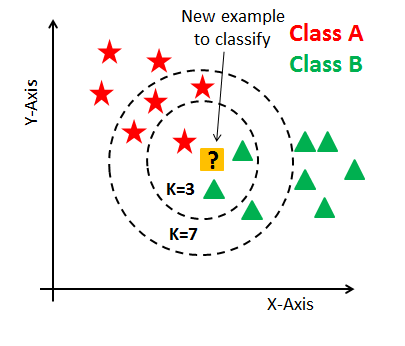

In [33]:
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        # Расчет расстояний между всеми точками
        distances = np.sqrt(((X[:, np.newaxis] - self.X_train) ** 2).sum(axis=2))
        # Находим индексы k ближайших соседей для каждой точки
        k_indices = np.argsort(distances, axis=1)[:, :self.k]
        # Получаем метки классов ближайших соседей
        k_nearest_labels = self.y_train[k_indices]
        # Определяем наиболее часто встречающийся класс среди соседей
        predictions = np.array([np.argmax(np.bincount(labels)) for labels in k_nearest_labels])
        return predictions

    def count_distance(self, x, y):
      # YOUR CODE HERE
      pass

In [34]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [35]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [38]:
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/eb2cd3de1f0d30edc2fedb958bf67397408dd324/2024/homeworks/hw04_knn_linreg/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [39]:
# Проверка наличия пропущенных значений
missing_values = data.isnull().sum()
print("Пропущенные значения:")
print(missing_values)

# Удаление бессмысленных столбцов:
# столбец 'Unnamed: 0' является идентификатором и не несет дополнительной информации
data.drop(columns=['Unnamed: 0'], inplace=True)

Пропущенные значения:
Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


**Пропусков нет**

**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [41]:
# Вычисление матрицы выборочных корреляций
correlation_matrix = data.corr()
correlation_matrix




<ipython-input-41-d19373e20174>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [42]:
# Поиск признаков, коррелирующих с целевой переменной больше всего
target_correlation = correlation_matrix['price'].abs().sort_values(ascending=False)
target_correlation

price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth    0.010647
Name: price, dtype: float64

**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [43]:
# Кодирование категориальных переменных при помощи OneHot-кодирования
data_encoded = pd.get_dummies(data)
data_encoded.head()


,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [47]:
from sklearn.model_selection import train_test_split

# Выделение целевой переменной
data_y = data_encoded['price']
data_x = data_encoded.drop(columns=['price'])

# Создание разбиения на классы по целевой переменной для stratify
data_classes = pd.qcut(data_y, q=100, duplicates='drop')

# Разделение на тренировочные и тестовые выборки в указанном соотношении
data_train, data_test, data_train_y, data_test_y = train_test_split(data_x, data_y, test_size=0.3, random_state=42, stratify=data_classes)


**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [48]:
scaler = StandardScaler()

# Масштабирование вещественных признаков тренировочной выборки
data_train_scaled = scaler.fit_transform(data_train)
data_train_scaled = pd.DataFrame(data_train_scaled, columns=data_train.columns)

# Масштабирование вещественных признаков тестовой выборки
data_test_scaled = scaler.transform(data_test)
data_test_scaled = pd.DataFrame(data_test_scaled, columns=data_test.columns)


**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
# Обучение модели на тренировочных данных
lin_reg.fit(data_train_scaled, data_train_y)

# Предсказание на тренировочной выборке
train_pred = lin_reg.predict(data_train_scaled)
# Предсказание на тестовой выборке
test_pred = lin_reg.predict(data_test_scaled)

# Вычисление среднеквадратичной ошибки на тренировочной выборке
train_mse = mean_squared_error(data_train_y, train_pred)
# Вычисление среднеквадратичной ошибки на тестовой выборке
test_mse = mean_squared_error(data_test_y, test_pred)

# Вывод среднеквадратичной ошибки на тренировочной и тестовой выборках
print("Среднеквадратичная ошибка на тренировочной выборке:", train_mse)
print("Среднеквадратичная ошибка на тестовой выборке:", test_mse)


Среднеквадратичная ошибка на тренировочной выборке: 1256433.798350002
Среднеквадратичная ошибка на тестовой выборке: 1324963.8234837828


**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [50]:
coefficients = pd.DataFrame(lin_reg.coef_, index=data_train_scaled.columns, columns=['Coefficient'])
coefficients

,Coefficient
carat,5353.069969
depth,-90.328406
table,-60.420844
x,-1210.794456
y,67.462183
z,-29.877315
cut_Fair,-122.864464
cut_Good,-41.140757
cut_Ideal,53.133408
cut_Premium,17.040629


**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [52]:
from sklearn.linear_model import Lasso, Ridge

# Обучение Lasso-регрессии
lasso_reg = Lasso(alpha=10)
lasso_reg.fit(data_train_scaled, data_train_y)

# Обучение Ridge-регрессии
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(data_train_scaled, data_train_y)

coefficients_df = pd.DataFrame(index=data_train_scaled.columns)
coefficients_df['Linear'] = lin_reg.coef_
coefficients_df['Lasso'] = lasso_reg.coef_
coefficients_df['Ridge'] = ridge_reg.coef_
coefficients_df



,Linear,Lasso,Ridge
carat,5353.069969,4880.581393,5314.608436
depth,-90.328406,-58.293023,-87.740446
table,-60.420844,-47.266854,-60.187692
x,-1210.794456,-685.073379,-1154.912460
y,67.462183,-0.000000,53.332460
z,-29.877315,-36.106267,-34.179531
cut_Fair,-122.864464,-124.690654,-123.197458
cut_Good,-41.140757,-41.746898,-41.194504
cut_Ideal,53.133408,44.692630,53.167837
cut_Premium,17.040629,0.000000,16.881217


Из таблицы видно, что коэффициенты некоторых признаков для Lasso-регрессии и отличаются от коэффициентов линейной регрессии. В случае Lasso-регрессии некоторые веса были уменьшены (некоторые даже до нуля, что означает их полное исключение из модели). В случае Ridge-регрессии многие веса остались неизменными
Таким образом, проблема мультиколлинеарности проявлялась в изначальной регрессии, что привело к нестабильным оценкам коэффициентов. Применение Lasso и помогло справиться с этой проблемой, уменьшив веса признаков и сделав модель более устойчивой

**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

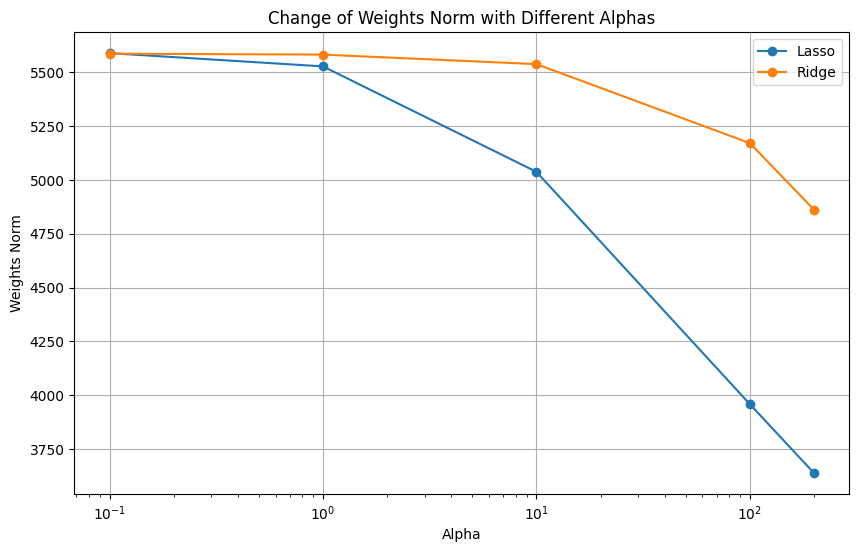

In [53]:
# Значения параметра регуляризации alpha
alphas = [0.1, 1, 10, 100, 200]

# Создание списков для хранения норм весов для Lasso и Ridge
lasso_norms = []
ridge_norms = []

# Обучение моделей и вычисление норм весов
for alpha in alphas:
    # Обучение Lasso-регрессии
    lasso = Lasso(alpha=alpha)
    lasso.fit(data_train_scaled, data_train_y)
    lasso_norms.append(np.linalg.norm(lasso.coef_))

    # Обучение Ridge-регрессии
    ridge = Ridge(alpha=alpha)
    ridge.fit(data_train_scaled, data_train_y)
    ridge_norms.append(np.linalg.norm(ridge.coef_))

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(alphas, lasso_norms, label='Lasso', marker='o')
plt.plot(alphas, ridge_norms, label='Ridge', marker='o')
plt.xlabel('Alpha')
plt.ylabel('Weights Norm')
plt.title('Change of Weights Norm with Different Alphas')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

**Из графика видно, что Lasso-регрессия агрессивнее уменьшает веса при увеличении параметра регуляризации $\alpha$. Это происходит из-за того, что Lasso-регрессия использует L1-регуляризацию, которая ведет к обнулению некоторых коэффициентов, делая отбор признаков более жестким. Это делает Lasso-регрессию популярным выбором для отбора наиболее информативных признаков, поскольку она позволяет исключить неинформативные признаки из модели**

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [54]:
from sklearn.linear_model import LassoCV


alphas = [0.1, 1, 10, 100, 200]
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(data_train_scaled, data_train_y)
# матрица ошибок:
mse_path = lasso_cv.mse_path_

# Усредняем ошибки для каждого значения alpha
mean_mse = np.mean(mse_path, axis=1)

# Находим значение alpha, которое дает наименьшую среднюю ошибку
best_alpha = lasso_cv.alpha_
print("Best alpha:", best_alpha)


Best alpha: 1.0


**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [60]:
lasso_final = Lasso(alpha=1.0)
lasso_final.fit(data_train, data_train_y)
coefficients = pd.DataFrame(data=lasso_final.coef_.T, columns=["Lasso coefficient"], index=data_train.columns)
coefficients


,Lasso coefficient
carat,11144.505830
depth,-64.946425
table,-28.456790
x,-976.289150
y,0.000000
z,-22.130010
cut_Fair,-690.595539
cut_Good,-129.783882
cut_Ideal,106.314183
cut_Premium,33.047311


**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [61]:
print("Ошибка на тестовой выборке (Linear Regression): ", mean_squared_error(lin_reg.predict(data_test), data_test_y),
      "\nОшибка на тестовой выборке (Lasso Regression): ", mean_squared_error(lasso_final.predict(data_test), data_test_y))


Ошибка на тестовой выборке (Linear Regression):  138847447.0937943 
Ошибка на тестовой выборке (Lasso Regression):  1324554.410176431


**На основе среднеквадратичных ошибок на тестовой выборке можно сделать вывод, что модель Lasso Regression незначительно лучше подходит для предсказания цен на бриллианты по сравнению с обычной линейной регрессией. Основное объяснение заключается в том, что Lasso-регрессия применяет L1-регуляризацию, которая способствует отбору наиболее информативных признаков и уменьшает влияние малозначимых признаков**